In [1]:
import warnings
import random

import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.exceptions import ConvergenceWarning
import seaborn as sns
import matplotlib.pyplot as plt

from estimation_utils import load_data, load_graph, estimate_effects, propensity_overlap_graph

In [2]:
plt.style.use('ggplot')

In [3]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [4]:
seed = 42
random.seed(seed)
np.random.seed(seed)

In [5]:
df = load_data()
graph = load_graph()
results = estimate_effects(df, graph)
pd.DataFrame(results, index=[0]).T.rename(columns={0: "ATE"})

,ATE
backdoor.propensity_score_matching,6.491686
backdoor.propensity_score_weighting,7.118456
backdoor.propensity_score_stratification,6.859097
backdoor.linear_regression,6.872629
backdoor.distance_matching,6.302204
backdoor.T_learner,6.994563


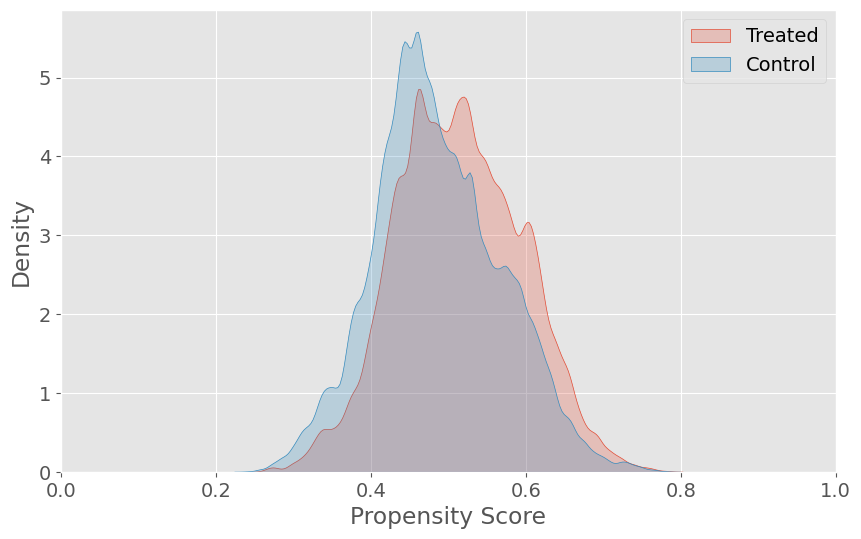

Common support approx in [0.264, 0.784]. Coverage — Treated: 1.000, Control: 1.000


In [6]:
ps_model = LogisticRegression(max_iter=2000, class_weight="balanced")
_ = propensity_overlap_graph(
    df, graph, method="backdoor.propensity_score_weighting", ps_model=ps_model,
    figpath="figs/propensity_overlap.svg"
)

In [7]:
results, ci_df, boot_df = estimate_effects(df, graph, return_cis=True, n_boot=2)

  0%|          | 0/2 [00:00<?, ?it/s]

In [8]:
boot_df = boot_df.rename(columns={
    c: ' '.join(c.split('.')[1:]).title().replace('_', ' ')
    for c in boot_df.columns
})

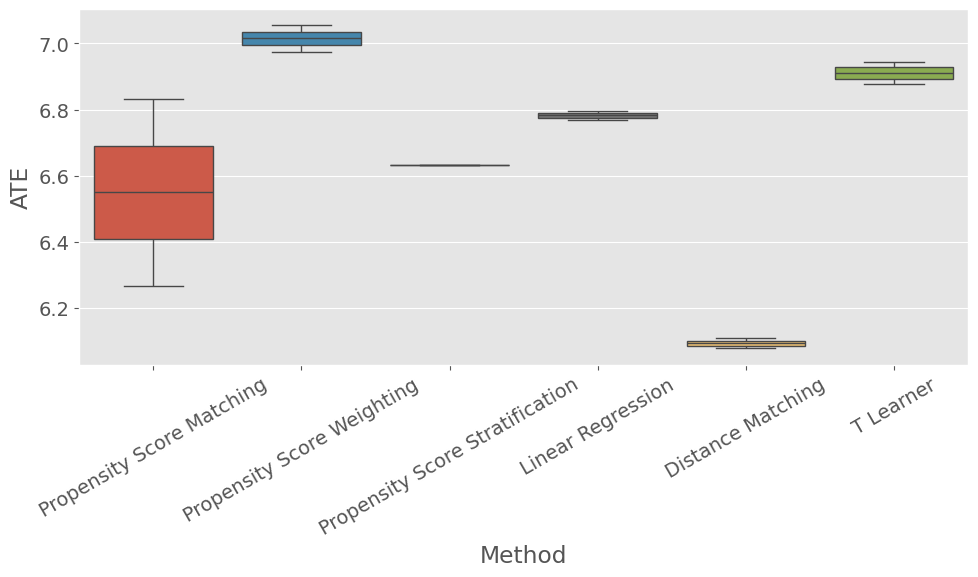

In [9]:
plt.figure(figsize=(10,6))
sns.boxplot(data=boot_df)
plt.ylabel("ATE")
plt.xlabel("Method")
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()